In [1]:
f_size = 16
fig_size = (6,4)

In [11]:
theta_size = [1, 10, 100] # xlabel
res = {
    '30b':
    {
        'acc': [72.12, 72.24, 73.00],
        'thr': [8.12, 8.11, 7.85]
    },
    '66b':
    {
        'acc': [71.38, 74.55, 74.98],
        'thr': [13.080278, 9.973732, 9.850342]
    }
}


In [12]:
import matplotlib.pyplot as plt
def plot_theta_ablation(theta_size, res, label='30b'):
    
    # Plot the line graph
    fig, ax1 = plt.subplots(figsize=fig_size)

    # Set the first y-axis (accuracy) and plot the line
    ax1.set_xlabel('Theta', fontsize=f_size+2)
    ax1.set_ylabel('Accuracy (%)', fontsize=f_size+2)
    ax1.plot(theta_size, res[label]['acc'], 'b-o', label=f'{label} Acc')
    ax1.set_xscale('log')
    ax1.set_xticks(theta_size)
    ax1.set_xticklabels(theta_size, fontsize=f_size)
    ax1.tick_params(axis='y', labelsize=f_size)
    ax1.grid(True, linestyle='--', linewidth=0.5)

    # Set the second y-axis (throughput) and plot the line
    ax2 = ax1.twinx()
    ax2.set_ylabel('Throughput (Token/s)', fontsize=16)
    ax2.plot(theta_size, res[label]['thr'], 'b--o', label=f'{label} Thr')
    ax2.set_xscale('log')
    ax2.set_xticks(theta_size)
    x_labels = [f'{theta}x' for theta in theta_size]
    ax2.set_xticklabels(x_labels, fontsize=f_size)
    ax2.tick_params(axis='y', labelsize=f_size)
    ax2.grid(True, linestyle='--', linewidth=0.5)

    # Add legends
    lns1, labs1 = ax1.get_legend_handles_labels()
    lns2, labs2 = ax2.get_legend_handles_labels()
    ax2.legend(lns1+lns2, labs1+labs2, loc='center right', fontsize=f_size)

    plt.tight_layout()
    plt.savefig(f'theta_ablation_{label}.pdf')
    plt.show()

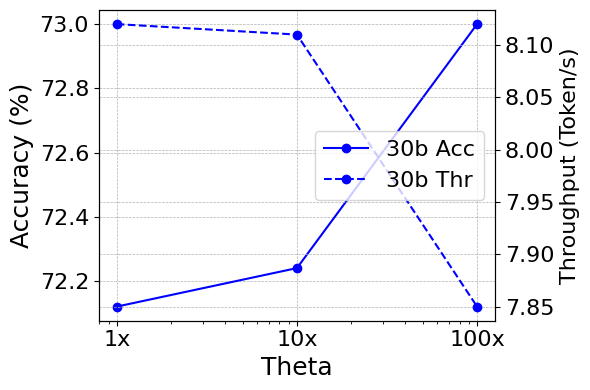

In [13]:
plot_theta_ablation(theta_size, res, label='30b')

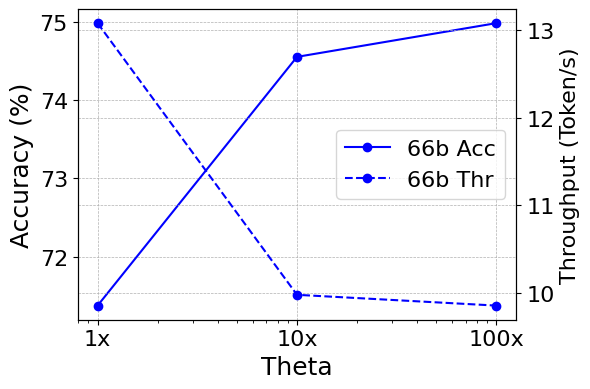

In [14]:
plot_theta_ablation(theta_size, res, label='66b')

In [141]:
gamma_size = [0.6, 0.8, 1] # xlabel
res_gamma = {
    '30b':
    {
        'pipeedge': [4.590317, 6.01, 7.276429],
        'adaqpipe': [20.746677, 22.07, 23.130831]
    },
    '66b':
    {
        'pipeedge': [37.407494, 39.24, 40.708042],
        'adaqpipe': [41.093355, 44.87, 45.334859]
    }
}

In [142]:
import matplotlib.pyplot as plt

def plot_data(res, gamma_size, label='30b'):
    # Plot the line graph
    fig, ax = plt.subplots(figsize=fig_size)
    value = res[label]
    ax.plot(gamma_size, value['pipeedge'], 'b--o', label='pipeedge')
    ax.plot(gamma_size, value['adaqpipe'], 'b-o', label='adaqpipe')

    # Set the axis labels and ticks
    ax.set_xlabel('Gamma', fontsize=f_size + 2)
    ax.set_ylabel('Throughput (Token/s)', fontsize=f_size+2)
    ax.set_xticks(gamma_size)
    ax.tick_params(axis='both', labelsize=f_size)
    ax.grid(True, linestyle='--', linewidth=0.5)

    # Add legend
    ax.legend(loc='center right', bbox_to_anchor=(1, 0.65), fontsize=f_size)

    plt.tight_layout()
    plt.savefig(f'gamma_ablation_{label}.png')
    plt.show()

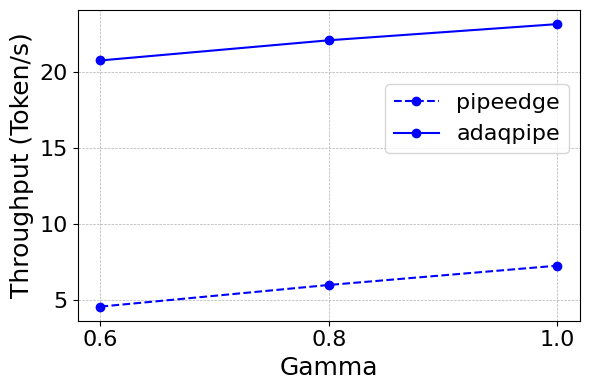

In [143]:
plot_data(res_gamma, gamma_size, label='30b')

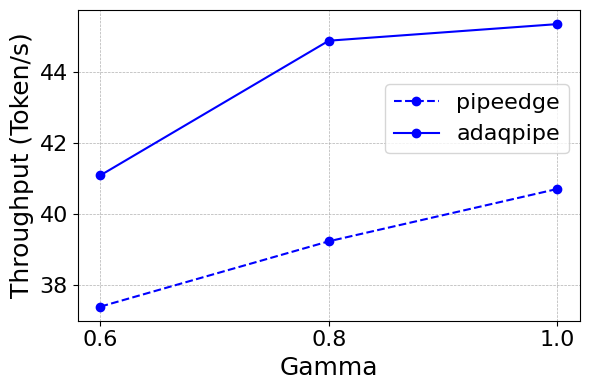

In [144]:
plot_data(res_gamma, gamma_size, label='66b')